# Q.2 Gaussian Mixture Models Clustering


*   Akshay Bankar (2019201011)



In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import norm
import pickle
import math
import random 
np.random.seed(0)


Expectation-Maximization :

    Expectation (E) step: Using the current estimate for the parameters, create function for the expectation of the log-likelihood.

    Maximization (M) step: Computes parameters maximizing the expected log-likelihood found on the E step.

\begin{equation*}
\left (P(Z_i=k|X_i) = \frac{P(X_i|Z_i=k)P(Z_i=k)}{P(X_i)} = \frac{\pi_k N(\mu_k,\sigma_k^2)}{\sum_{k=1}^K\pi_k N(\mu_k, \sigma_k)} = \gamma_{Z_i}(k) \tag{2})

\end{equation*}
The M parameter-estimates are then used to determine the distribution of the latent variables in the next E step.


EM Steps

    Initialize the parameters θ
    Compute the best values for Z given θ
    Use the computed values of Z to compute a better estimate for the θ
    Iterate steps 2 and 3 until convergence




Log-likelihood at iteration  1  :  0.0


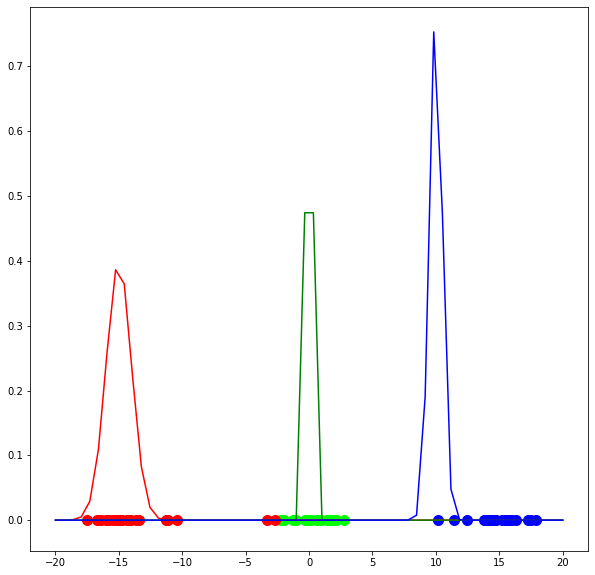

Log-likelihood at iteration  2  :  4.440892098500625e-16


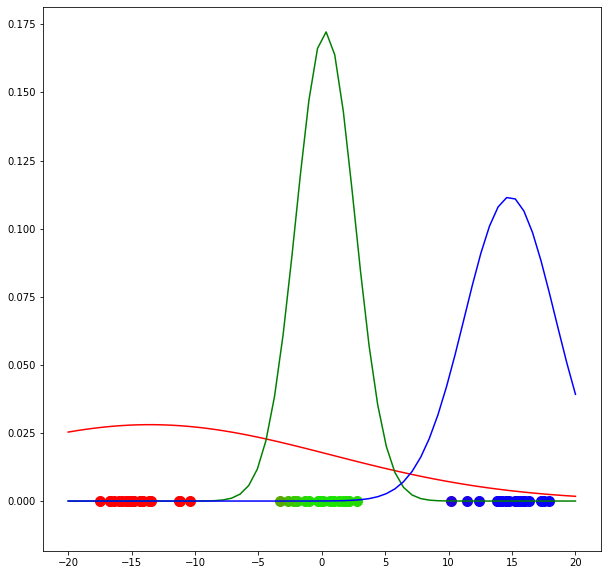

Log-likelihood at iteration  3  :  -1.1102230246251578e-16


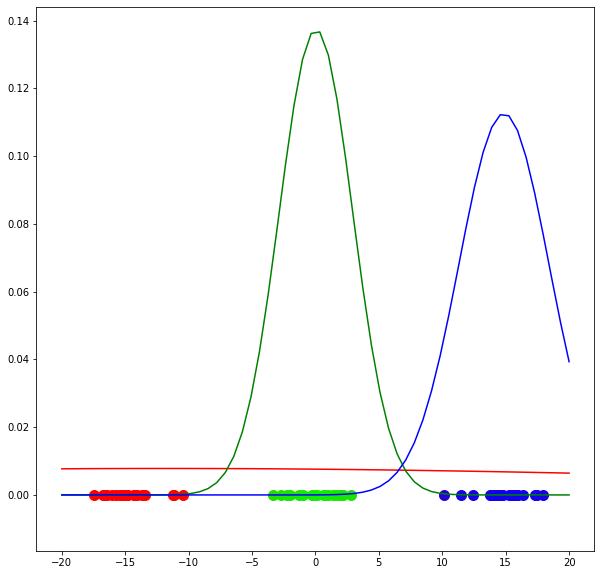

Log-likelihood at iteration  4  :  -4.440892098500626e-16


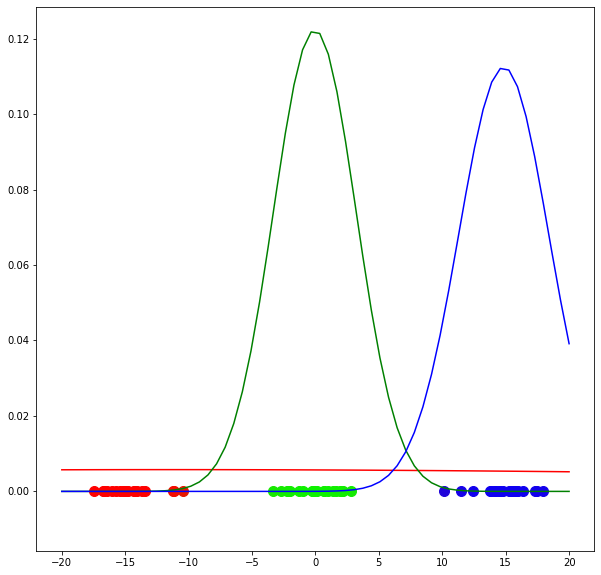

Log-likelihood at iteration  5  :  -1.3322676295501878e-15


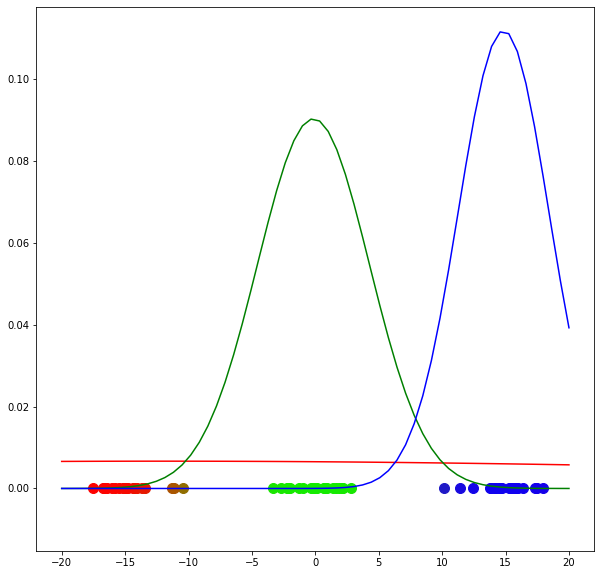

Log-likelihood at iteration  6  :  -4.440892098500626e-16


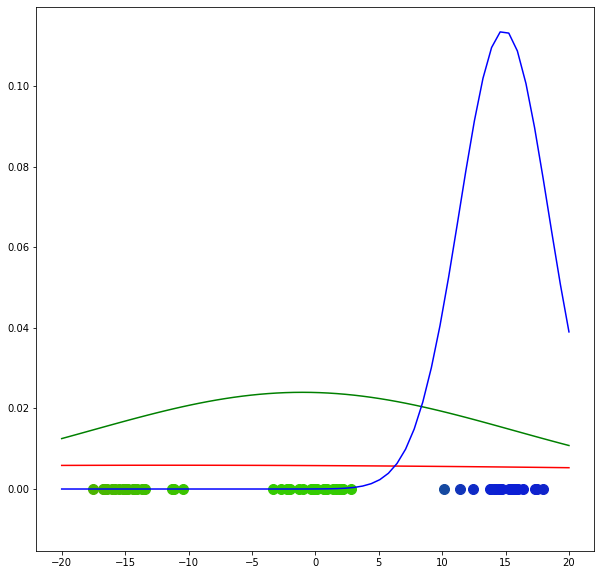

Log-likelihood at iteration  7  :  -2.220446049250313e-16


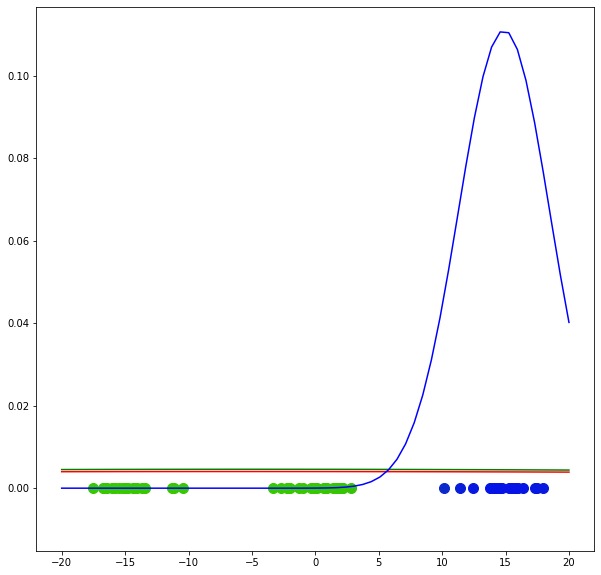

Log-likelihood at iteration  8  :  -7.771561172376096e-16


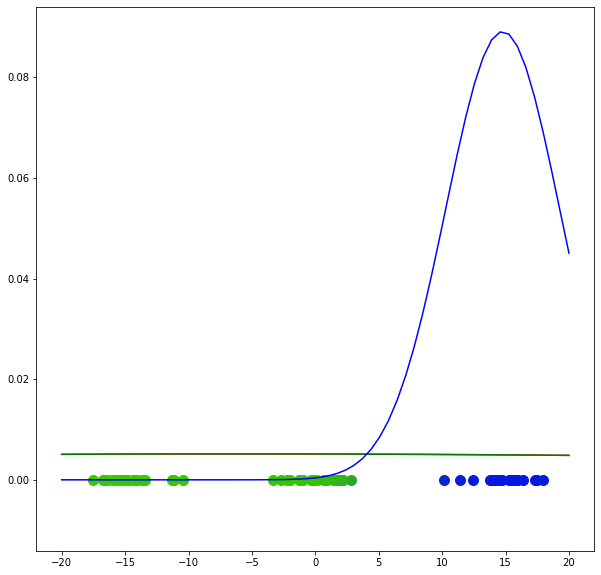

Log-likelihood at iteration  9  :  -9.992007221626409e-16


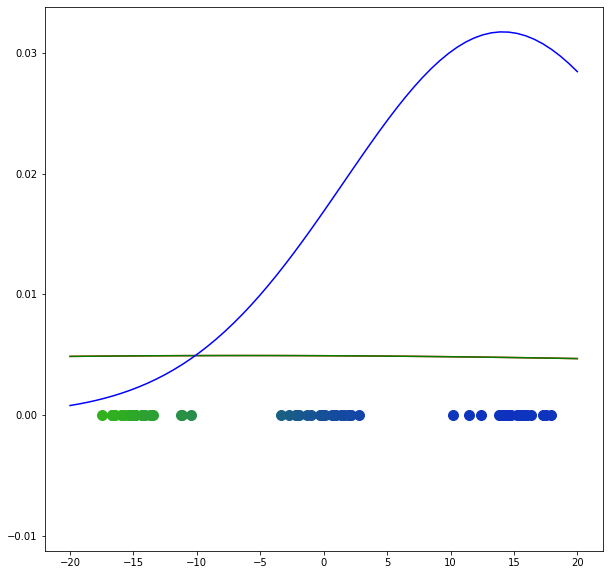

Log-likelihood at iteration  10  :  -7.771561172376096e-16


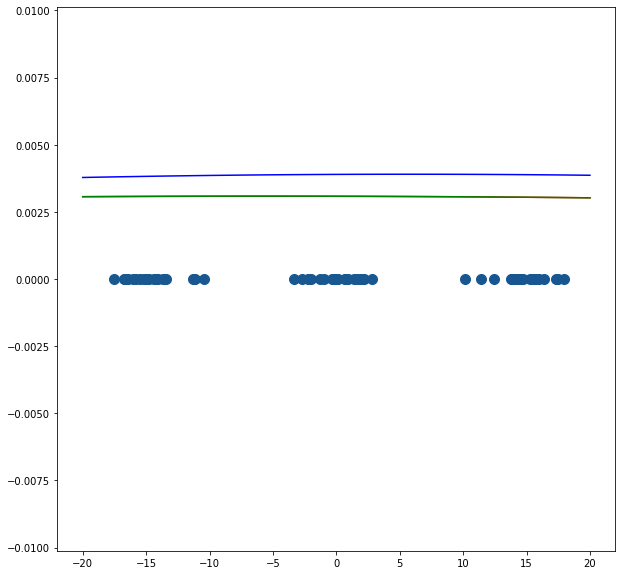

In [0]:
def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
        """initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f] """    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
    
    """E step"""
    def show_data(self):
        print(self.mu)
        print(self.pi)
        print(self.var)
    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
            denom = r[i,0]+r[i,1]+r[i,2]
            r[i, :] = [x / denom for x in r[i,:]] 
            
        
        return r
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            ax0.scatter(self.X[i],0,c=[[r[i][0],r[i][1],r[i][2]]],s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g,c=c)

    def find_log_likelihood(self, r):
        new_likelihood = 0
        for i in range(len(self.X)):
            temp = 0
            for k in range(len(self.mu)):
                temp += r[i,k]
            new_likelihood += np.log(temp)
        return new_likelihood

    def run(self):
        #np.zeros_like(r)
        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            self.plot(r)
            
            """M-Step"""

            """calculate m_c"""
            m_c = []
            
            
            """calculate pi_c"""
            for i in range(3):
                weights = r[:,i]
                denom = sum(weights)
                self.pi[i] = denom/len(self.X) #weights
            
            """calculate mu_c"""
            for i in range(3):
                weights = r[:,i]
                denom = sum(weights)
                mean = sum( w*d/denom for (w,d) in zip(weights, self.X))
                self.mu[i] = mean
#             self.mu = 


            """calculate var_c"""
            var_c = []
            for i in range(3):
                weights = r[:,i]
                denom = sum(weights)
                variance = (sum( w*((d-self.mu[i])**2) for (w,d) in zip(weights, self.X))/denom)
                self.var[i] = variance
            #print("Iter: ", iter)
            #self.show_data()

            log_like = self.find_log_likelihood(r)
            print("Log-likelihood at iteration ", iter+1, " : ",log_like)
            plt.show()


#To run the code
data = load("/content/dataset1.pkl") 
mu_min = min(data)
mu_max = max(data)
m1 = [-15,0,10]
m2 = [-25,-15,0]
m3 = [-10,8,25]
g = GMM1D(data.flatten(),10,m1,[1/3,1/3,1/3],
                   [1,0.2,0.5])
#g = GMM1D(data,10,[random.uniform(mu_min, mu_max),random.uniform(mu_min, mu_max),random.uniform(mu_min, mu_max)],[1/3,1/3,1/3],
#                   [random.uniform(0.1,1),random.uniform(0.1,1),random.uniform(0.1,1)])
g.run()

## Using Sklearn's GMM :

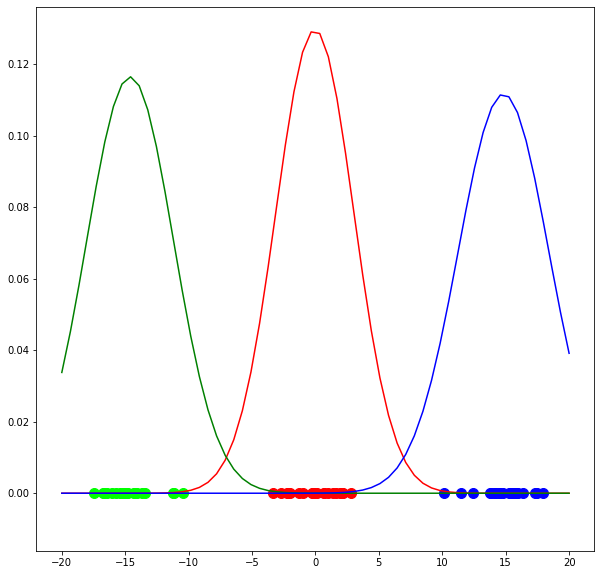

In [0]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn
#sklearn_pca = PCA(n_components = 2)
#Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(data)
prediction_gmm = gmm.predict(data)
probs = gmm.predict_proba(data)

centers = np.zeros((3,1))
for i in range(3):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(data)
    centers[i, :] = data[np.argmax(density)]

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for i in range(len(data)):
    ax0.scatter(data[i],0,c=[[probs[i][0],probs[i][1],probs[i][2]]],s=100)
"""Plot the gaussians"""
for g,c in zip([norm(loc=gmm.means_[0],scale=gmm.covariances_[0]).pdf(np.linspace(-20,20,num=60)),
                norm(loc=gmm.means_[1],scale=gmm.covariances_[1]).pdf(np.linspace(-20,20,num=60)),
                norm(loc=gmm.means_[2],scale=gmm.covariances_[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
    ax0.plot(np.linspace(-20,20,num=60),g.flatten(),c=c)